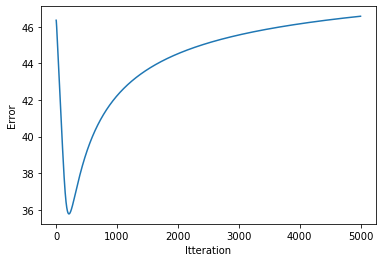

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class ANN:

    def __init__(self, file_path, v_neuron, w_neuron):
        self.data = pd.read_csv(file_path, header = None, sep=" ")

        self.v_neuron = v_neuron
        self.w_neuron = w_neuron

        self.matrix_y = self.y_matrix(self.data[2])

        self.matrix_x = self.input_matrix_x()
        self.matrix_x_extended = self.x_1_matrix()

        self.matrix_v = self.v_matrix()
        self.matrix_x_extended_2 = self.x_2_matrix()

        self.matrix_f = self.f_matrix()
        self.matrix_f_extended = self.f_1_matrix()

        self.matrix_w = self.w_matrix()
        self.matrix_f_extended_2 = self.f_2_matrix()

        self.matrix_g = self.g_matrix()

        self.error_history = []

    def y_matrix(self, y_data):
        matrix_y_init = np.zeros((len(self.data), 3))
        for i in range(len(self.data)):
            if y_data[i] == 0.0:
                matrix_y_init[i][0] = 1
            elif y_data[i] == 1.0:
                matrix_y_init[i][1] = 1
            elif y_data[i] == 2.0:
                matrix_y_init[i][2] = 1
        return matrix_y_init

    def input_matrix_x(self):
        return np.array([self.data[0], self.data[1]]).transpose()

    def x_1_matrix(self):
        ones = np.ones(((np.size(self.matrix_x, 0)), 1))
        return np.append(ones, self.matrix_x, axis=1)

    def v_matrix(self):
        return np.random.rand(np.size(self.matrix_x_extended, 1), self.v_neuron)

    def x_2_matrix(self):
        return self.matrix_x_extended.dot(self.matrix_v)

    def f_matrix(self):
        return 1 / (1 + np.exp(-self.matrix_x_extended_2))

    def f_1_matrix(self):
        ones = np.ones((np.size(self.matrix_f, 0), 1))
        return np.append(ones, self.matrix_f, axis=1)

    def w_matrix(self):
        return np.random.rand(self.v_neuron+1, self.w_neuron)

    def f_2_matrix(self):
        return self.matrix_f_extended.dot(self.matrix_w)

    def g_matrix(self):
        return 1 / (1 + np.exp(-self.matrix_f_extended_2))

    def sum_squared_errors_calculation(self):
        squares = (self.matrix_g - self.matrix_y) ** 2
        return np.sum(squares) / 2

    def w_correction(self, alpha_w):
        w_matrix_new = np.zeros((np.size(self.matrix_w, 0), np.size(self.matrix_w, 1)))
        # w of size (k+1)xJ
        for k in range(np.size(self.matrix_w, 0) - 1):
            for j in range(np.size(self.matrix_w, 1)):
                w = self.matrix_w[k][j]
                err = 0
                for i in range(np.size(self.matrix_g, 1)):
                    g = self.matrix_g[i][j]
                    y = self.matrix_y[i][j]
                    f = self.matrix_f[i][k]

                    err += (g - y) * g * (1 - g) * f
                w_matrix_new[k][j] = w - (alpha_w * err)
        return w_matrix_new

    def v_correction(self, alpha_v):
        v_matrix_new = np.zeros((np.size(self.matrix_v, 0), np.size(self.matrix_v, 1)))
        for n in range(np.size(self.matrix_x_extended, 1)):
            for k in range(np.size(self.matrix_v, 1)):
                v = self.matrix_v[n][k]
                err = 0
                for i in range(np.size(self.matrix_g, 0)):
                    f = self.matrix_f[i][k]
                    x_ext = self.matrix_x_extended[i][n]

                    for j in range(np.size(self.matrix_g, 1)):
                        g = self.matrix_g[i][j]
                        y = self.matrix_y[i][j]
                        w = self.matrix_w[k][j]
                        err += (g - y) * g * (-g) * w * f * (1 - f) * x_ext
                v_matrix_new[n][k] = v - (alpha_v * err)
        return v_matrix_new

    def FFNN(self, alpha_v=0.005, alpha_w=0.005, iter_max=5000):
        i = 0
        while i <= iter_max:
            self.matrix_w = self.w_correction(alpha_w)
            self.matrix_v = self.v_correction(alpha_v)

            self.matrix_x_extended_2 = self.x_2_matrix()

            self.matrix_f = self.f_matrix()
            self.matrix_f_extended = self.f_1_matrix()

            self.matrix_w = self.w_correction(alpha_w)
            self.matrix_f_extended_2 = self.f_2_matrix()

            self.matrix_g = self.g_matrix()

            err = self.sum_squared_errors_calculation()
            self.error_history.append(err)

            i += 1
        return self.g_matrix()

    def show_error_log(self):
        plt.plot(self.error_history)
        plt.ylabel("Error")
        plt.xlabel("Itteration")
        plt.show()


artificial_neural_network = ANN("data_ffnn_3classes.txt", 3, 3)

artificial_neural_network.FFNN()
artificial_neural_network.show_error_log()
